# Week 11: Data Analysis

This week we practice basic data analysis tools, such as curve fitting and computing statistical characteristic of data, using [SciPy](https://scipy.org) and [Pandas](https://pandas.pydata.org) libraries.

## Exercise 1: Anscombe's quartet 

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) consists of four small datasets that have identical simple statistical characteristics (such as mean and variance), yet have very different distributions, and look very different when plotted. The goal of this task is to investigate these datasets.

**a)** Load the datasets from `Anscombe.txt` file and store them as numpy arrays (you can use `numpy.loadtxt` function to load a text file). The file contains a matrix of 8 columns and 11 rows. Each two columns of this matrix represent $(x,y)-$coordinates of a singe dataset. 

In [6]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pylab as plt

In [7]:
anscombe = np.loadtxt('Anscombe.txt') # The file Anscombe.txt must be saved in the working directory (i.e., the same directoru where the Jupyter notebook is located)

anscombe

array([[ 4.  ,  4.26,  4.  ,  3.1 ,  4.  ,  5.39,  8.  ,  5.25],
       [ 5.  ,  5.68,  5.  ,  4.74,  5.  ,  5.73,  8.  ,  5.56],
       [ 6.  ,  7.24,  6.  ,  6.13,  6.  ,  6.08,  8.  ,  5.76],
       [ 7.  ,  4.82,  7.  ,  7.26,  7.  ,  6.42,  8.  ,  6.58],
       [ 8.  ,  6.95,  8.  ,  8.14,  8.  ,  6.77,  8.  ,  6.89],
       [ 9.  ,  8.81,  9.  ,  8.77,  9.  ,  7.11,  8.  ,  7.04],
       [10.  ,  8.04, 10.  ,  9.14, 10.  ,  7.46,  8.  ,  7.71],
       [11.  ,  8.33, 11.  ,  9.26, 11.  ,  7.81,  8.  ,  7.91],
       [12.  , 10.84, 12.  ,  9.13, 12.  ,  8.15,  8.  ,  8.47],
       [13.  ,  7.58, 13.  ,  8.74, 13.  , 12.74,  8.  ,  8.84],
       [14.  ,  9.96, 14.  ,  8.1 , 14.  ,  8.84, 19.  , 12.5 ]])

**b)** Calculate and print statistical characteristics of all the four datasets: expected value (`np.mean`) and variance (`np.var`).

In [8]:
mean = np.mean(anscombe, axis = 0) # calculate the expected value column by column

for i in range(0,8,2):
    print(f"Dataset {i//2}, x-mean : {mean[i]:.2f}")
    print(f"Dataset {i//2}, y-mean : {mean[i+1]:.2f}")
    print()

Dataset 0, x-mean : 9.00
Dataset 0, y-mean : 7.50

Dataset 1, x-mean : 9.00
Dataset 1, y-mean : 7.50

Dataset 2, x-mean : 9.00
Dataset 2, y-mean : 7.50

Dataset 3, x-mean : 9.00
Dataset 3, y-mean : 7.50



In [9]:
mean = np.var(anscombe, axis = 0) # calculate the variance column by column

for i in range(0,8,2):
    print(f"Dataset {i//2}, x-variance : {mean[i]:.2f}")
    print(f"Dataset {i//2}, y-variance : {mean[i+1]:.2f}")
    print()

Dataset 0, x-variance : 10.00
Dataset 0, y-variance : 3.75

Dataset 1, x-variance : 10.00
Dataset 1, y-variance : 3.75

Dataset 2, x-variance : 10.00
Dataset 2, y-variance : 3.75

Dataset 3, x-variance : 10.00
Dataset 3, y-variance : 3.75



**c)** Use ```scipy.optimize.curve_fit``` to fit a straight line, i.e., a function of the form $f(x)=ax+b$, to each of the datasets. Then plot each dataset together with the corresponding fitted curve. Place all the four plots in a single figure using suplots. 

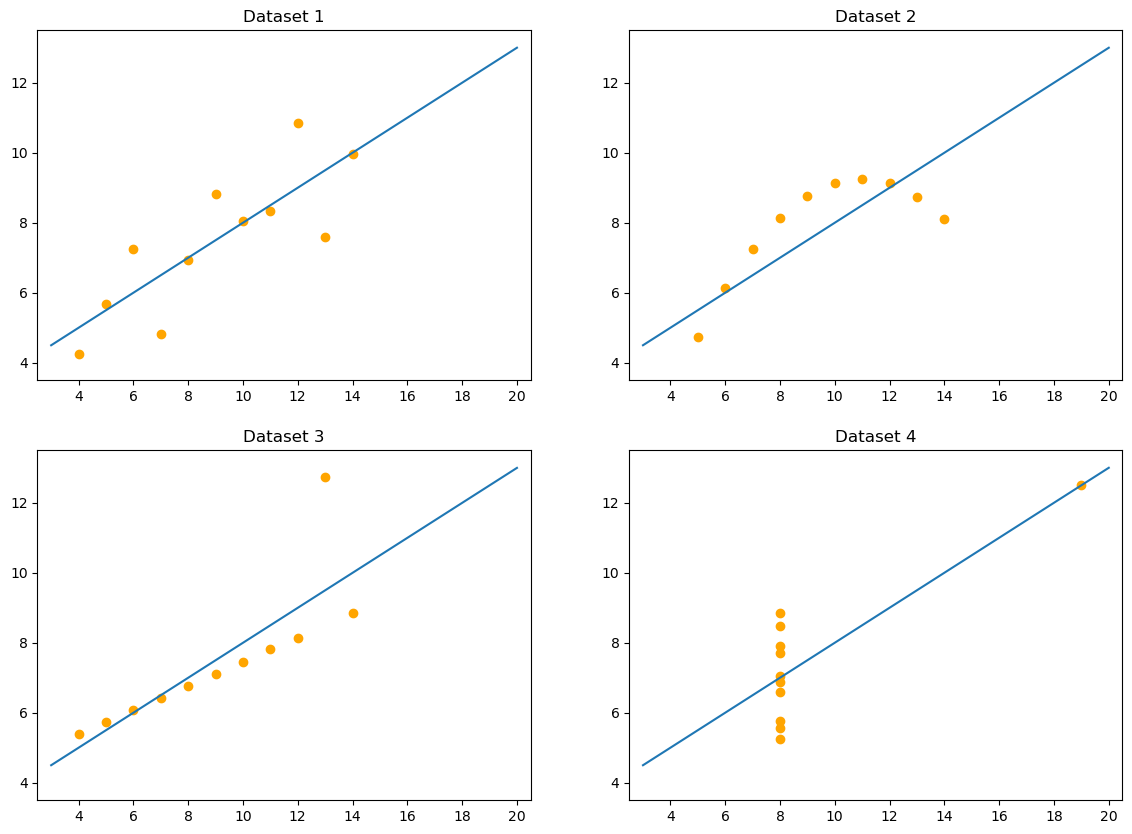

In [11]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

def linear_fit(x,a,b):
    return a*x+b

for i, ax_ in zip(range(0,8,2),ax.ravel()):
    # scatter plot the points of each dataset
    ax_.scatter(anscombe.T[i],anscombe.T[i+1], color = 'orange')
    
    # fit a linear regression curve 
    a, b = optimize.curve_fit(linear_fit, anscombe.T[i],anscombe.T[i+1])[0]

    # plot the linear regression line as b+at
    t = np.linspace(3,20)
    ax_.plot(t, b+t*a)
    
    ax_.set_title(f'Dataset {i//2+1}')

    ax_.set_xlim([2.5,20.5])
    ax_.set_ylim([3.5,13.5])


**d)** One can see that the relationship between $x$ and $y$ is non-linear in Dataset 2. Use ```scipy.optimize.curve_fit``` to fit a quadratic function, i.e. $f(x)=a+bx+cx^2$, to this dataset, and plot the results. 

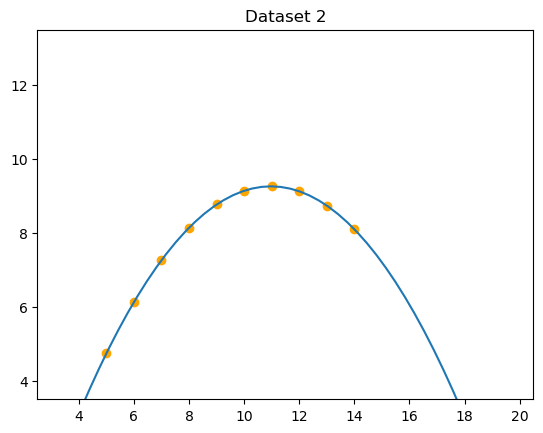

In [12]:
def quadratic_fit(x,a,b,c):
    return a + b*x + c*x**2

plt.scatter(anscombe.T[2],anscombe.T[3], color = 'orange')

a, b, c = optimize.curve_fit(quadratic_fit, anscombe.T[2], anscombe.T[3])[0]

t = np.linspace(3,20)
plt.plot(t, quadratic_fit(t,a,b,c))

plt.title(f'Dataset 2')

plt.xlim([2.5,20.5])
plt.ylim([3.5,13.5])

plt.show()

## Exercise 2: Irises

<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris setosa" width="200"/> </td> 
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg" alt="Iris virginica" width="325"/> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" alt="Iris versicolor" width="355"/> </td>
</tr></table>

[The iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a famous dataset that is often used as an example dataset for data analysis methods. This dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor) and contains four features: the length and the width of the sepals and petals, in centimeters. The goal is to distiguish between the species of irises based on these features.

**a)** Download the `iris.csv` file and load it in Python (you can use `pandas.read_csv` function).

In [13]:
df = pd.read_csv('iris.csv')

**b)** Get familiar with the data. You can use `df.head` and `df.tail` methods of a Pandas dataframe `df` to display first and last rows of the dataset. You can also use `df.describe` to compute basic descriptive statistics of the data.

In [14]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**c)** Use ```pd.plotting.scatter_matrix``` function to plot a matrix of all the two-dimensional projections of the data together with histograms of each feature.

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

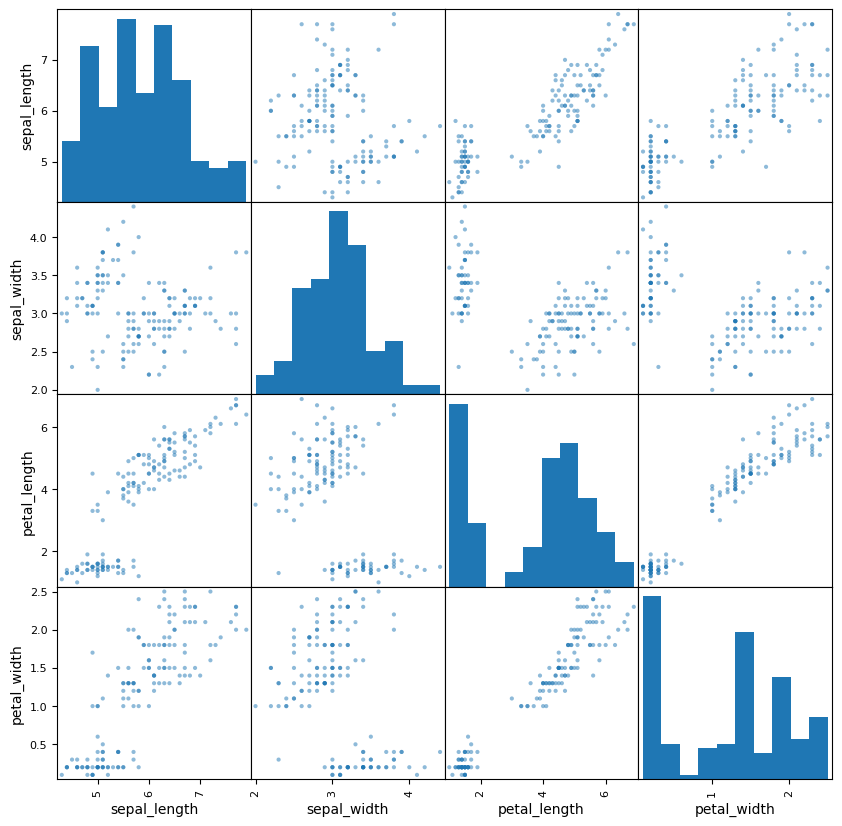

In [16]:
pd.plotting.scatter_matrix(df, figsize=(10,10))

**d)** Now change the same figure so that points corresponding to different classes have different colors in the scatter plots. 

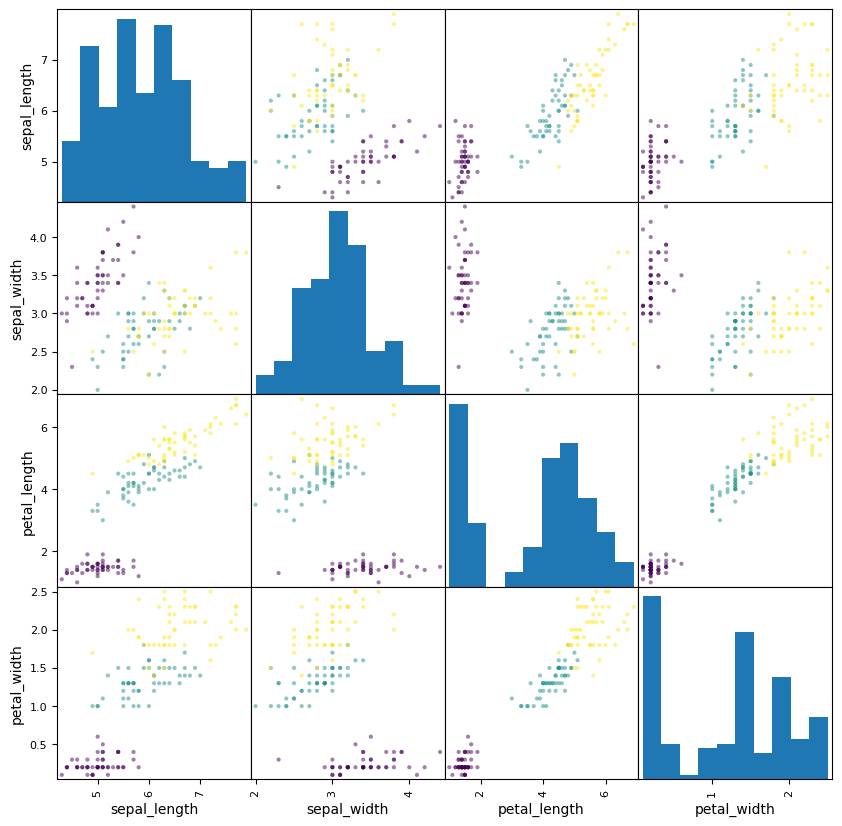

In [21]:
# create new column df['class'] with a number of class corresponding to each species of Irises
df['class'] = df['name'].replace(['setosa', 'versicolor', 'virginica'], [0,1,2]) 

# We can pass df['class'] column as argument c of pd.plotting.scatter_matrix function
# to color points of each class with different color
fig = pd.plotting.scatter_matrix(df[['sepal_length','sepal_width','petal_length','petal_width']], 
                                 c=df['class'], figsize=(10,10))

**e)** Use ```df.groupby``` to compute mean and variance of each of the four features separately for each class of irises.

In [22]:
df.groupby('name').mean()

,sepal_length,sepal_width,petal_length,petal_width,class
name,,,,,
setosa,5.006,3.418,1.464,0.244,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [23]:
df.groupby('name').var()

,sepal_length,sepal_width,petal_length,petal_width,class
name,,,,,
setosa,0.124249,0.145180,0.030106,0.011494,0.0
versicolor,0.266433,0.098469,0.220816,0.039106,0.0
virginica,0.404343,0.104004,0.304588,0.075433,0.0


**f)** Use ```df.groupby(...).boxplot``` method to generate boxplots of all the features separately for each class.

setosa             Axes(0.1,0.559091;0.363636x0.340909)
versicolor    Axes(0.536364,0.559091;0.363636x0.340909)
virginica              Axes(0.1,0.15;0.363636x0.340909)
dtype: object

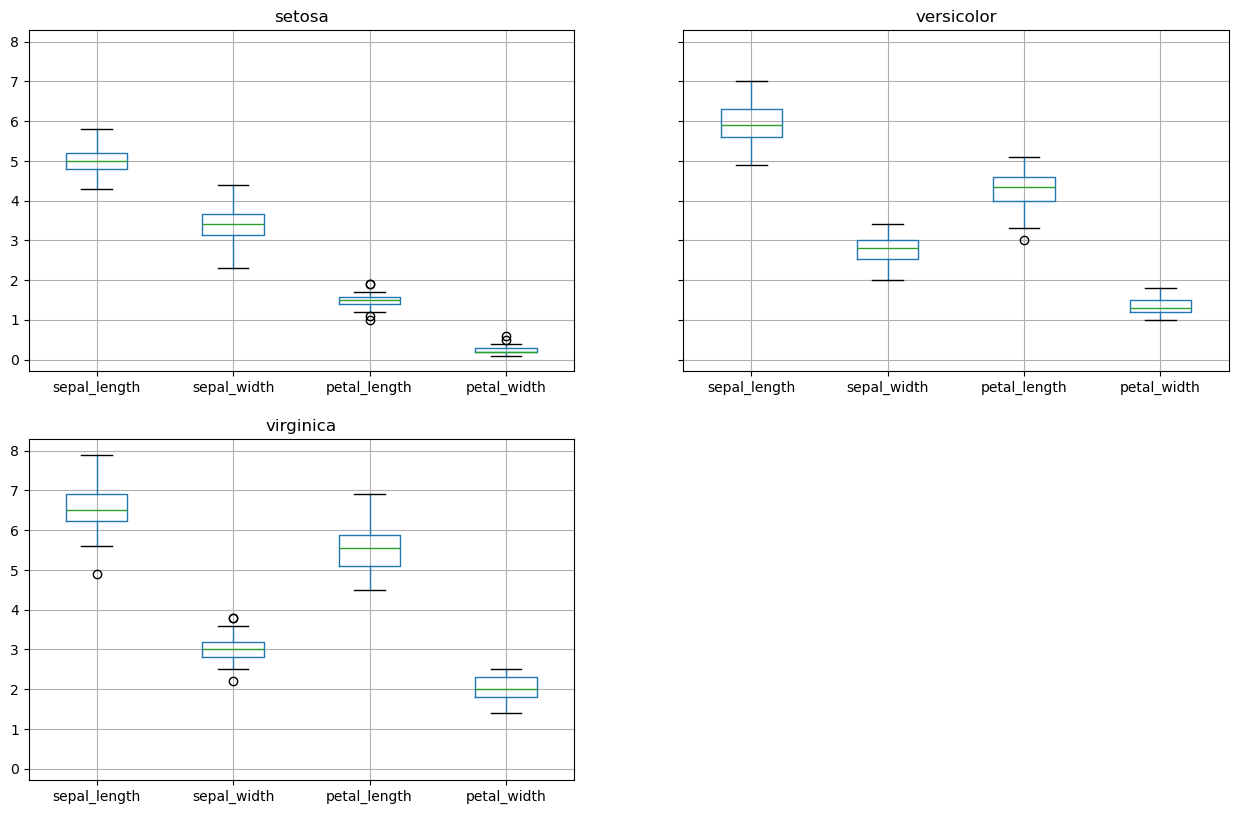

In [24]:
df.groupby('name').boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'], figsize=(15,10))